# <h2 align="center">بررسی تاثیر انواع الگوریتم های انتخاب ویژگی در تکنیک های یادگیری ماشین به منظور افزایش دقت در پیش بینی و تشخیص بیماری های قلبی <h2/>
    
<center>
    <img src=".\images\nitpic.png" width="200" alt="NIT logo"  />
</center>

# :استاد راهنما
دکتر فاطمه زمانی

# :دانشجو
امیررضا زارع

# Importing Needed packages

In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\SoftwareProject")
from cross_valdiation_score import k_fold_results
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn import svm
from keras.models import Sequential
from keras.layers import Dense
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.kernel_approximation import RBFSampler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.naive_bayes import MultinomialNB
warnings.filterwarnings('ignore')
%matplotlib inline

# Reading the data From csv

In [2]:
df = pd.read_csv("dataset\hdp.csv")

# take a look at the dataset
df.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
1,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
2,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
3,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
4,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0


In [3]:
df_col = df.columns.drop('target')
df_col

Index(['age', 'gender', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

# Description of Dataset columns

In [4]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic",
        "resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl",
        "resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina",
        "oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment",
        "number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect",
        "final result"]

for i in range(len(info)):
    print(df.columns[i]+":\t\t"+info[i])

age:		age
gender:		1: male, 0: female
cp:		chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:		resting blood pressure
chol:		 serum cholestoral in mg/dl
fbs:		fasting blood sugar > 120 mg/dl
restecg:		resting electrocardiographic results (values 0,1,2)
thalach:		 maximum heart rate achieved
exang:		exercise induced angina
oldpeak:		oldpeak = ST depression induced by exercise relative to rest
slope:		the slope of the peak exercise ST segment
ca:		number of major vessels (0-3) colored by flourosopy
thal:		thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
target:		final result


In [5]:
df.describe()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.307947,0.682119,3.149007,131.728477,246.390728,0.142384,0.993377,149.609272,0.324503,1.033113,1.589404,0.668874,4.705298,0.453642
std,9.053984,0.466426,0.958083,17.609245,51.628879,0.350024,0.994982,22.881167,0.468966,1.162236,0.612945,0.934548,1.938225,0.498673
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,47.000000,0.000000,3.000000,120.000000,211.250000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,240.500000,0.000000,1.000000,153.000000,0.000000,0.750000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,274.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [6]:
df.shape

(302, 14)

In [7]:
df_columns = df.columns
df_columns

Index(['age', 'gender', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   gender    302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


# Analyze the features on the chart

### First, analysing the 'target' feature:

0    165
1    137
Name: target, dtype: int64


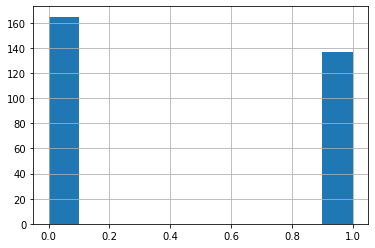

In [9]:
target_diagram = df["target"]
target_temp = df.target.value_counts()
print(target_temp)
target_diagram.hist()
plt.show()

### Analysing the 'age' feature:

In [10]:
df["age"].unique()

array([67, 37, 41, 56, 62, 57, 63, 53, 44, 52, 48, 54, 49, 64, 58, 60, 50,
       66, 43, 40, 69, 59, 42, 55, 61, 65, 71, 51, 46, 45, 39, 68, 47, 34,
       35, 29, 70, 77, 38, 74, 76], dtype=int64)

58    19
57    17
54    16
59    14
51    13
60    12
52    12
44    11
62    11
56    11
41    10
64    10
42     9
67     9
43     8
55     8
45     8
61     8
63     8
65     8
53     7
50     7
48     7
46     7
66     6
47     6
49     5
39     4
70     4
68     4
35     4
69     3
71     3
40     3
37     2
38     2
34     2
76     1
29     1
74     1
77     1
Name: age, dtype: int64


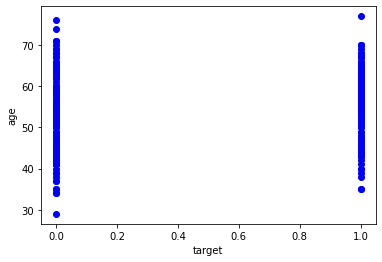

In [11]:
age_temp = df.age.value_counts()
print(age_temp)
plt.scatter(df.target, df.age, color='blue')
plt.xlabel("target")
plt.ylabel("age")
plt.show()

### Analysing the 'gender' feature:

In [12]:
df["gender"].unique()

array([1, 0], dtype=int64)

as expected, the 'gender' feature has 2 unique features

1    206
0     96
Name: gender, dtype: int64


<AxesSubplot:xlabel='gender', ylabel='target'>

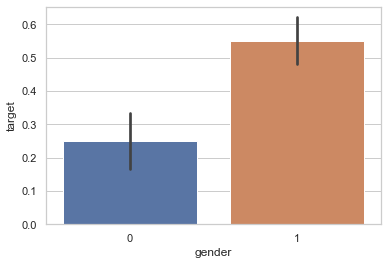

In [13]:
gender_temp = df.gender.value_counts()
print(gender_temp)
sns.set_theme(style="whitegrid")
sns.barplot(df["gender"],target_diagram)

females are more likely to have heart problems than males

### Analysing the 'cp' (Chest Pain Type) feature:

In [14]:
df["cp"].unique()

array([4, 3, 2, 1], dtype=int64)

4    141
3     88
2     50
1     23
Name: cp, dtype: int64


<AxesSubplot:xlabel='cp', ylabel='target'>

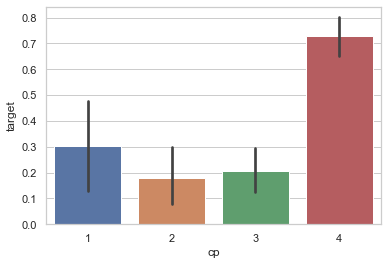

In [15]:
cp_temp = df.cp.value_counts()
print(cp_temp)
sns.set_theme(style="whitegrid")
sns.barplot(df["cp"],target_diagram)

### Analysing the 'FBS' (fasting blood sugar) feature:

In [16]:
df["fbs"].unique()

array([0, 1], dtype=int64)

0    259
1     43
Name: fbs, dtype: int64


<AxesSubplot:xlabel='fbs', ylabel='target'>

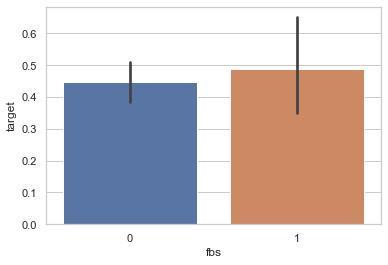

In [17]:
fbs_temp = df.fbs.value_counts()
print(fbs_temp)
sns.set_theme(style="whitegrid")
sns.barplot(df["fbs"],target_diagram)

Nothing extraordinary here

### Analysing the 'restecg' (esting electrocardiographic results) feature:

In [18]:
df["restecg"].unique()

array([2, 0, 1], dtype=int64)

0    150
2    148
1      4
Name: restecg, dtype: int64


<AxesSubplot:xlabel='restecg', ylabel='target'>

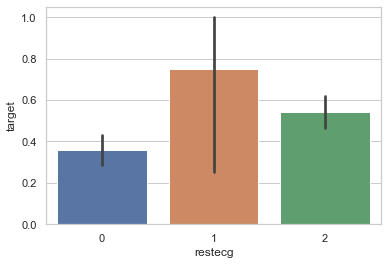

In [19]:
restecg_temp = df.restecg.value_counts()
print(restecg_temp)
sns.set_theme(style="whitegrid")
sns.barplot(df["restecg"],target_diagram)

the people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

### Analysing the 'exang' (exercise induced angina) feature:

In [20]:
df["exang"].unique()

array([1, 0], dtype=int64)

0    204
1     98
Name: exang, dtype: int64


<AxesSubplot:xlabel='exang', ylabel='target'>

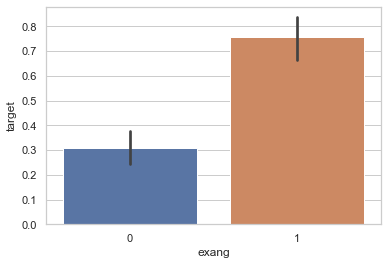

In [21]:
exang_temp = df.exang.value_counts()
print(exang_temp)
sns.set_theme(style="whitegrid")
sns.barplot(df["exang"],target_diagram)

the People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems

### Analysing the 'slope' (the slope of the peak exercise ST segment) feature:

In [22]:
df["slope"].unique()

array([2, 3, 1], dtype=int64)

1    144
2    138
3     20
Name: slope, dtype: int64


<AxesSubplot:xlabel='slope', ylabel='target'>

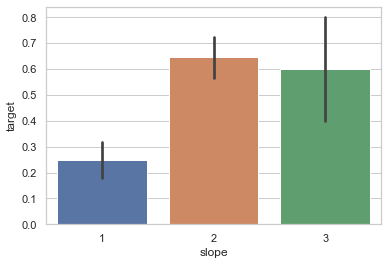

In [23]:
slope_temp = df.slope.value_counts()
print(slope_temp)
sns.set_theme(style="whitegrid")
sns.barplot(df["slope"],target_diagram)

Slope '2' causes heart pain much more than Slope '0' and '1'

### Analysing the 'ca' (number of major vessels (0-3) colored by flourosopy) feature:

In [24]:
df["ca"].unique()

array([3, 2, 0, 1], dtype=int64)

0    178
1     66
2     38
3     20
Name: ca, dtype: int64


<AxesSubplot:xlabel='ca', ylabel='target'>

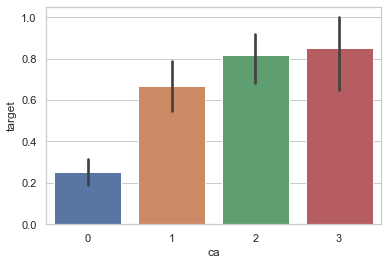

In [25]:
ca_temp = df.ca.value_counts()
print(ca_temp)
sns.set_theme(style="whitegrid")
sns.barplot(df["ca"],target_diagram)

ca=4 has astonishingly large number of heart patients

Analysing the 'thal' feature:

In [26]:
df["thal"].unique()

array([3, 7, 6], dtype=int64)

3    169
7    116
6     17
Name: thal, dtype: int64


<AxesSubplot:xlabel='thal', ylabel='target'>

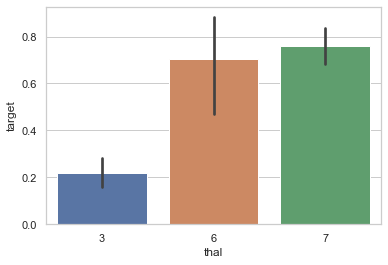

In [27]:
thal_temp = df.thal.value_counts()
print(thal_temp)
sns.set_theme(style="whitegrid")
sns.barplot(df["thal"],target_diagram)

# Check the output of the algorithms without feature selection

In [183]:
algo={
    'NB':MultinomialNB(alpha=1.0),
    'Logistic Regression':LogisticRegression(),
    'SVM':svm.SVC(kernel='poly',random_state=5),
    'KNN':KNeighborsClassifier(n_neighbors=5),
    'Dtree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(random_state=2),
    'Multi-layer-Perceptron':MLPClassifier(solver='lbfgs', alpha=1e-5,random_state=3),
    'XGBoost':xgb.XGBClassifier(objective="binary:logistic", random_state=3),
    'Stochastic-Gradient-Descent':SGDClassifier(loss="hinge", penalty="l2", max_iter=8),
    'AdaBoost':AdaBoostClassifier(n_estimators=100, random_state=3),
    'LightGBM ':LGBMClassifier(),
    'catBoost':CatBoostClassifier(verbose=0, n_estimators=100),
}

df2 = df.drop(['target'], axis = 1)
df_col =df2.columns
result_beforeNorm=k_fold_results(df2[df_col],df['target'],algo=algo)
result_beforeNorm.T

,accuracy,recall,specificity,precision,F1
SVM,0.665591,0.521020,0.793024,0.684098,0.576713
Logistic Regression,0.837634,0.790223,0.882577,0.855234,0.814679
NB,0.774839,0.740221,0.809954,0.774513,0.748464
KNN,0.655806,0.594574,0.722234,0.639783,0.603076
Dtree,0.744516,0.745637,0.748481,0.713548,0.723367
Random Forest,0.820753,0.773439,0.865846,0.833590,0.796767
Multi-layer-Perceptron,0.824301,0.778293,0.871987,0.841103,0.799116
XGBoost,0.797742,0.771132,0.825124,0.786666,0.773846
Stochastic-Gradient-Descent,0.592688,0.506009,0.705384,0.614566,0.447018
AdaBoost,0.797527,0.751125,0.841825,0.804699,0.771656


In [184]:
res_pure=result_beforeNorm.T
MLA=res_pure.index
scores_pure = res_pure['accuracy'].values


In [185]:
MLA=MLA.values
MLA[1] = 'LR'
MLA[5] = 'RF'
MLA[6] = 'MLP'
MLA[7] = 'XGB'
MLA[8] = 'SGD'
MLA[10] = 'LGBM'
MLA

array(['SVM', 'LR', 'NB', 'KNN', 'Dtree', 'RF', 'MLP', 'XGB', 'SGD',
       'AdaBoost', 'LGBM', 'catBoost'], dtype=object)

In [186]:
scores_pure

array([0.6655914 , 0.83763441, 0.77483871, 0.65580645, 0.74451613,
       0.82075269, 0.82430108, 0.79774194, 0.59268817, 0.79752688,
       0.80430108, 0.82397849])

<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

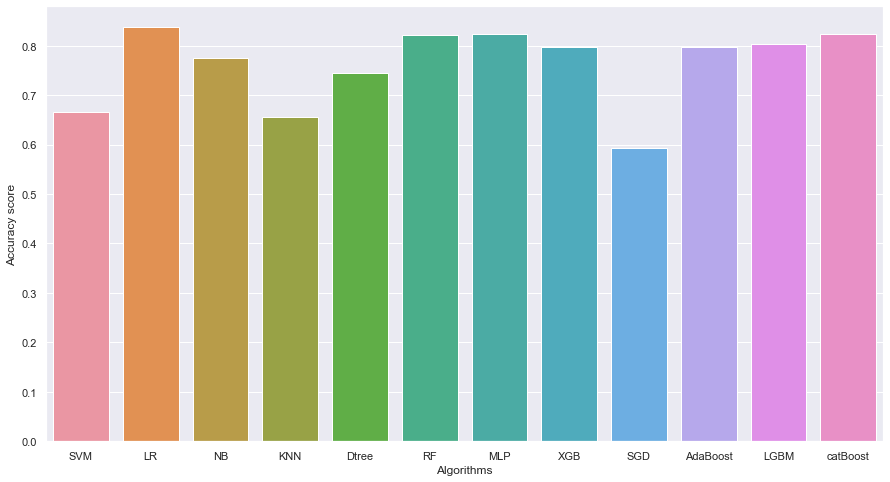

In [187]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(MLA,scores_pure)

# Read minmax.csv

In [188]:
df_minmax = pd.read_csv('dataset\minmax.csv')
df_minmax.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.791667,1,1.000000,0.622642,0.365297,0,1.0,0.282443,1,0.241935,0.5,1.000000,0.0,1
1,0.791667,1,1.000000,0.245283,0.235160,0,1.0,0.442748,1,0.419355,0.5,0.666667,1.0,1
2,0.166667,1,0.666667,0.339623,0.283105,0,0.0,0.885496,0,0.564516,1.0,0.000000,0.0,0
3,0.250000,0,0.333333,0.339623,0.178082,0,1.0,0.770992,0,0.225806,0.0,0.000000,0.0,0
4,0.562500,1,0.333333,0.245283,0.251142,0,0.0,0.816794,0,0.129032,0.0,0.000000,0.0,0


# Feature Selections methods

### Correlation:

In [189]:
df_minmax.head(10)

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.791667,1,1.000000,0.622642,0.365297,0,1.0,0.282443,1,0.241935,0.5,1.000000,0.00,1
1,0.791667,1,1.000000,0.245283,0.235160,0,1.0,0.442748,1,0.419355,0.5,0.666667,1.00,1
2,0.166667,1,0.666667,0.339623,0.283105,0,0.0,0.885496,0,0.564516,1.0,0.000000,0.00,0
3,0.250000,0,0.333333,0.339623,0.178082,0,1.0,0.770992,0,0.225806,0.0,0.000000,0.00,0
4,0.562500,1,0.333333,0.245283,0.251142,0,0.0,0.816794,0,0.129032,0.0,0.000000,0.00,0
5,0.687500,0,1.000000,0.433962,0.324201,0,1.0,0.679389,0,0.580645,1.0,0.666667,0.00,1
6,0.583333,0,1.000000,0.245283,0.520548,0,0.0,0.702290,1,0.096774,0.0,0.000000,0.00,0
7,0.708333,1,1.000000,0.339623,0.292237,0,1.0,0.580153,0,0.225806,0.5,0.333333,1.00,1
8,0.500000,1,1.000000,0.433962,0.175799,1,1.0,0.641221,1,0.500000,1.0,0.000000,1.00,1
9,0.583333,1,1.000000,0.433962,0.150685,0,0.0,0.587786,0,0.064516,0.5,0.000000,0.75,0


<AxesSubplot:>

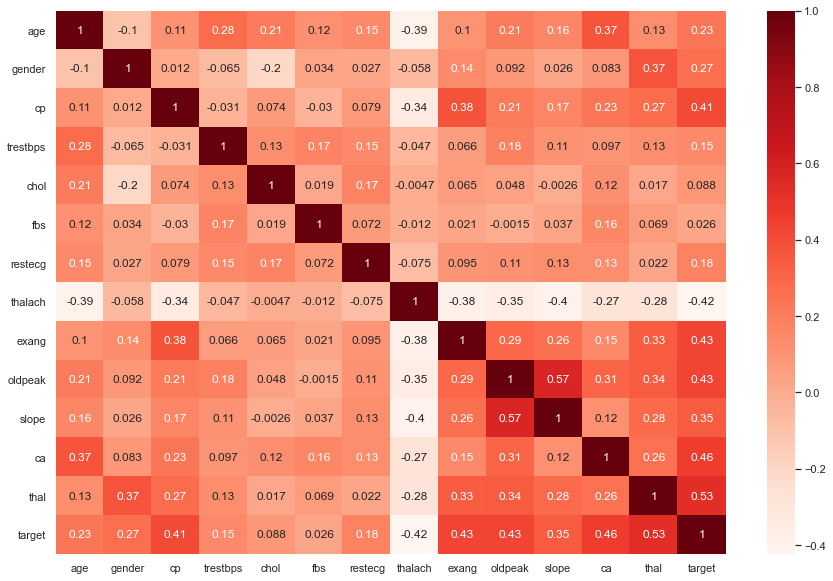

In [190]:
cor = df_minmax.corr()
plt.figure(figsize = (15,10))
sns.heatmap(cor, annot=True,cmap=plt.cm.Reds)

In [191]:
#Correlation with output variable
cor_target = abs(cor["target"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.4]
relevant_features

cp         0.409720
thalach    0.423769
exang      0.429033
oldpeak    0.431761
ca         0.463886
thal       0.531372
target     1.000000
Name: target, dtype: float64

In [192]:
df_select_correlation = np.array(relevant_features.index)
df_select_correlation

array(['cp', 'thalach', 'exang', 'oldpeak', 'ca', 'thal', 'target'],
      dtype=object)

In [193]:
df_correlation = df_minmax.copy()
df_correlation = df_minmax[df_select_correlation]
df_correlation.head()

,cp,thalach,exang,oldpeak,ca,thal,target
0,1.000000,0.282443,1,0.241935,1.000000,0.0,1
1,1.000000,0.442748,1,0.419355,0.666667,1.0,1
2,0.666667,0.885496,0,0.564516,0.000000,0.0,0
3,0.333333,0.770992,0,0.225806,0.000000,0.0,0
4,0.333333,0.816794,0,0.129032,0.000000,0.0,0


## Check the output of the algorithms for df_corr (output of Correlation) :

In [58]:
algo={
    'NB':MultinomialNB(alpha=1.0),
    'Logistic Regression':LogisticRegression(),
    'SVM':svm.SVC(kernel='poly',random_state=1),
    'KNN':KNeighborsClassifier(n_neighbors=5),
    'Dtree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(random_state=2),
    'Multi-layer-Perceptron':MLPClassifier(solver='lbfgs', alpha=1e-5,random_state=3),
    'XGBoost':xgb.XGBClassifier(objective="binary:logistic", random_state=3),
    'Stochastic-Gradient-Descent':SGDClassifier(loss="hinge", penalty="l2", max_iter=8),
    'AdaBoost':AdaBoostClassifier(n_estimators=100, random_state=3),
    'LightGBM ':LGBMClassifier(),
    'catBoost':CatBoostClassifier(verbose=0, n_estimators=100),
}




df2_corr = df_correlation.drop(['target'], axis = 1)
df_corr_col =df2_corr.columns
result_beforeNorm=k_fold_results(df2_corr[df_corr_col],df['target'],algo=algo)
result_beforeNorm.T




,accuracy,recall,specificity,precision,F1
SVM,0.811505,0.740189,0.880227,0.852992,0.780716
Logistic Regression,0.840968,0.789960,0.887221,0.872508,0.818907
NB,0.817957,0.763939,0.871562,0.850665,0.793602
KNN,0.817742,0.767156,0.863526,0.835006,0.793261
Dtree,0.754624,0.726125,0.782931,0.736752,0.726571
Random Forest,0.801290,0.752535,0.844374,0.808901,0.771694
Multi-layer-Perceptron,0.804624,0.773030,0.839082,0.810716,0.782352
XGBoost,0.774946,0.744695,0.807346,0.774233,0.750688
Stochastic-Gradient-Descent,0.771720,0.745304,0.818677,0.783859,0.740342
AdaBoost,0.787957,0.750477,0.818000,0.791566,0.757645


In [59]:
res_Correlation=result_beforeNorm.T
scores_Correlation = res_Correlation['accuracy'].values
MLA

array(['SVM', 'LR', 'NB', 'KNN', 'Dtree', 'RF', 'MLP', 'XGB', 'SGD',
       'AdaBoost', 'LGBM', 'catBoost'], dtype=object)

<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

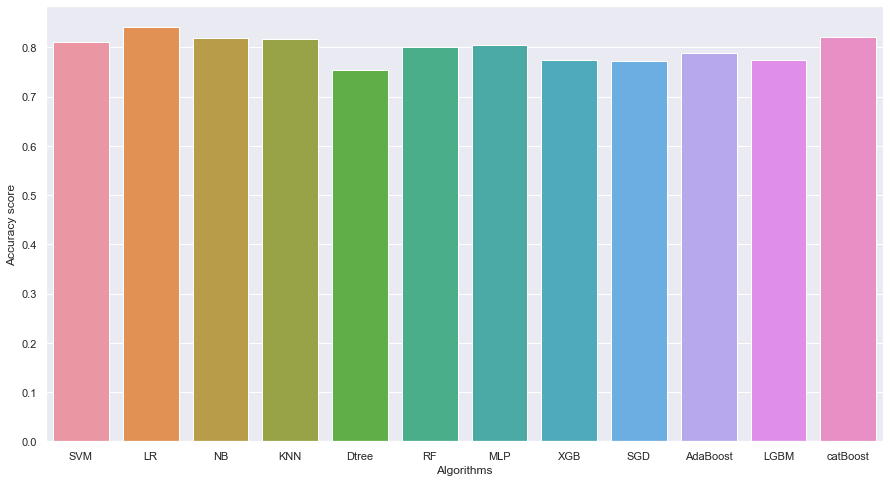

In [60]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(MLA,scores_Correlation)

### variance threshold:

In [77]:
df_minmax.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.791667,1,1.000000,0.622642,0.365297,0,1.0,0.282443,1,0.241935,0.5,1.000000,0.0,1
1,0.791667,1,1.000000,0.245283,0.235160,0,1.0,0.442748,1,0.419355,0.5,0.666667,1.0,1
2,0.166667,1,0.666667,0.339623,0.283105,0,0.0,0.885496,0,0.564516,1.0,0.000000,0.0,0
3,0.250000,0,0.333333,0.339623,0.178082,0,1.0,0.770992,0,0.225806,0.0,0.000000,0.0,0
4,0.562500,1,0.333333,0.245283,0.251142,0,0.0,0.816794,0,0.129032,0.0,0.000000,0.0,0


In [101]:
VarThreshOld = VarianceThreshold(threshold=0.04)
VarThreshOld.fit(df_minmax)
temp=VarThreshOld.get_support()
temp


array([False,  True,  True, False, False,  True,  True, False,  True,
       False,  True,  True,  True,  True])

In [102]:
df_minmax_columns = df_minmax.columns
df_minmax_columns

Index(['age', 'gender', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [103]:
df_select_ThreshOld=[]
for index in range(0,len(temp)):
    if (temp[index]==True):
        df_select_ThreshOld.append(df_minmax_columns[index])
       
df_select_ThreshOld

['gender', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [104]:
df_ThreshOld = df_minmax.copy()
df_ThreshOld = df_ThreshOld[df_select_ThreshOld]
df_ThreshOld.head()

,gender,cp,fbs,restecg,exang,slope,ca,thal,target
0,1,1.000000,0,1.0,1,0.5,1.000000,0.0,1
1,1,1.000000,0,1.0,1,0.5,0.666667,1.0,1
2,1,0.666667,0,0.0,0,1.0,0.000000,0.0,0
3,0,0.333333,0,1.0,0,0.0,0.000000,0.0,0
4,1,0.333333,0,0.0,0,0.0,0.000000,0.0,0


In [105]:
print("The number of features resulting from the 'variance threshold':",len(df_ThreshOld.columns))

The number of features resulting from the 'variance threshold': 9


## Check the output of the algorithms for df_ThreshOld (output of variance threshold) :

In [106]:
algo={
    'NB':MultinomialNB(alpha=1.0),
    'Logistic Regression':LogisticRegression(),
    'SVM':svm.SVC(kernel='poly',random_state=1),
    'KNN':KNeighborsClassifier(n_neighbors=5),
    'Dtree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(random_state=2),
    'Multi-layer-Perceptron':MLPClassifier(solver='lbfgs', alpha=1e-5,random_state=3),
    'XGBoost':xgb.XGBClassifier(objective="binary:logistic", random_state=3),
    'Stochastic-Gradient-Descent':SGDClassifier(loss="hinge", penalty="l2", max_iter=8),
    'AdaBoost':AdaBoostClassifier(n_estimators=100, random_state=3),
    'LightGBM ':LGBMClassifier(),
    'catBoost':CatBoostClassifier(verbose=0, n_estimators=100),
}




df2_to = df_ThreshOld.drop(['target'], axis = 1)
df_to_col =df2_to.columns
result_beforeNorm=k_fold_results(df2_to[df_to_col],df['target'],algo=algo)
result_beforeNorm.T

,accuracy,recall,specificity,precision,F1
SVM,0.807634,0.772157,0.843326,0.797227,0.777614
Logistic Regression,0.837634,0.789318,0.881338,0.857073,0.811398
NB,0.745806,0.678768,0.812965,0.750569,0.700652
KNN,0.797957,0.772920,0.821498,0.793587,0.774897
Dtree,0.790968,0.751395,0.818268,0.789705,0.765792
Random Forest,0.800968,0.789202,0.817970,0.787960,0.784101
Multi-layer-Perceptron,0.754839,0.725599,0.791557,0.745398,0.726441
XGBoost,0.791183,0.744960,0.835256,0.785311,0.758831
Stochastic-Gradient-Descent,0.774409,0.775108,0.776854,0.789801,0.729475
AdaBoost,0.820860,0.789723,0.844666,0.817582,0.791514


In [107]:
res_ThreshOld=result_beforeNorm.T
scores_ThreshOld = res_ThreshOld['accuracy'].values

<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

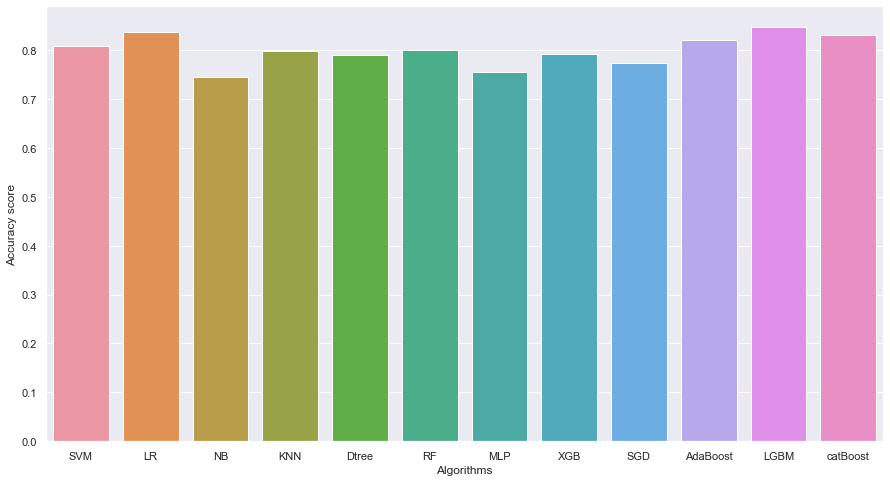

In [108]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(MLA,scores_ThreshOld)

### Recursive feature elimination(RFE):

In [109]:
predictors_minmax = df_minmax.drop("target",axis=1)
target_minmax = df_minmax["target"]

X_train_minmax ,X_test_minmax ,y_train_minmax ,y_test_minmax = train_test_split(predictors_minmax,target_minmax,test_size=0.30,random_state=0)

In [110]:
df_minmax_col = df_minmax.columns.drop('target')
df_minmax_col

Index(['age', 'gender', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [123]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
lin_reg = LinearRegression()

rfe_mod = RFECV(lin_reg,cv=10) 
myvalues=rfe_mod.fit(X_train_minmax,y_train_minmax) 
myvalues.support_
myvalues.ranking_ 

print("Num Features: %s" % (myvalues.n_features_))
print("Selected Features: %s" % (myvalues.support_))
print("Feature Ranking: %s" % (myvalues.ranking_))  

Num Features: 6
Selected Features: [False False  True  True False False False  True False  True False  True
  True]
Feature Ranking: [6 2 1 1 8 5 3 1 4 1 7 1 1]


In [124]:
myvalues.support_

array([False, False,  True,  True, False, False, False,  True, False,
        True, False,  True,  True])

In [125]:
df_select_rfe = []
for i in range(0,len(myvalues.support_)):
    if(myvalues.support_[i]==True):
        df_select_rfe.append(df_minmax_columns[i])
df_select_rfe.append('target')
df_rfe = df_minmax.copy()
df_rfe = df_rfe[df_select_rfe]
df_rfe.head()

,cp,trestbps,thalach,oldpeak,ca,thal,target
0,1.000000,0.622642,0.282443,0.241935,1.000000,0.0,1
1,1.000000,0.245283,0.442748,0.419355,0.666667,1.0,1
2,0.666667,0.339623,0.885496,0.564516,0.000000,0.0,0
3,0.333333,0.339623,0.770992,0.225806,0.000000,0.0,0
4,0.333333,0.245283,0.816794,0.129032,0.000000,0.0,0


## Check the output of the algorithms for df_rfe (output of RFE):

In [126]:
algo={
    'NB':MultinomialNB(alpha=1.0),
    'Logistic Regression':LogisticRegression(),
    'SVM':svm.SVC(kernel='poly',random_state=1),
    'KNN':KNeighborsClassifier(n_neighbors=5),
    'Dtree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(random_state=2),
    'Multi-layer-Perceptron':MLPClassifier(solver='lbfgs', alpha=1e-5,random_state=3),
    'XGBoost':xgb.XGBClassifier(objective="binary:logistic", random_state=3),
    'Stochastic-Gradient-Descent':SGDClassifier(loss="hinge", penalty="l2", max_iter=8),
    'AdaBoost':AdaBoostClassifier(n_estimators=100, random_state=3),
    'LightGBM ':LGBMClassifier(),
    'catBoost':CatBoostClassifier(verbose=0, n_estimators=100),
}



df2_rfe = df_rfe.drop(['target'], axis = 1)
df_rfe_col =df2_rfe.columns
result_beforeNorm=k_fold_results(df2_rfe[df_rfe_col],df['target'],algo=algo)
result_beforeNorm.T

,accuracy,recall,specificity,precision,F1
SVM,0.798172,0.732881,0.861665,0.823119,0.766745
Logistic Regression,0.824516,0.794433,0.856109,0.833953,0.806125
NB,0.798172,0.768144,0.836694,0.806967,0.777256
KNN,0.801398,0.752124,0.851304,0.819540,0.773113
Dtree,0.735054,0.705367,0.765602,0.718741,0.704606
Random Forest,0.774946,0.728291,0.821625,0.778149,0.744310
Multi-layer-Perceptron,0.728280,0.716746,0.750937,0.705763,0.701711
XGBoost,0.751720,0.735599,0.769598,0.741110,0.730778
Stochastic-Gradient-Descent,0.785269,0.692953,0.866524,0.848980,0.741384
AdaBoost,0.774839,0.735592,0.813686,0.767947,0.744748


In [127]:
res_rfe = result_beforeNorm.T
scores_rfe = res_rfe['accuracy'].values

<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

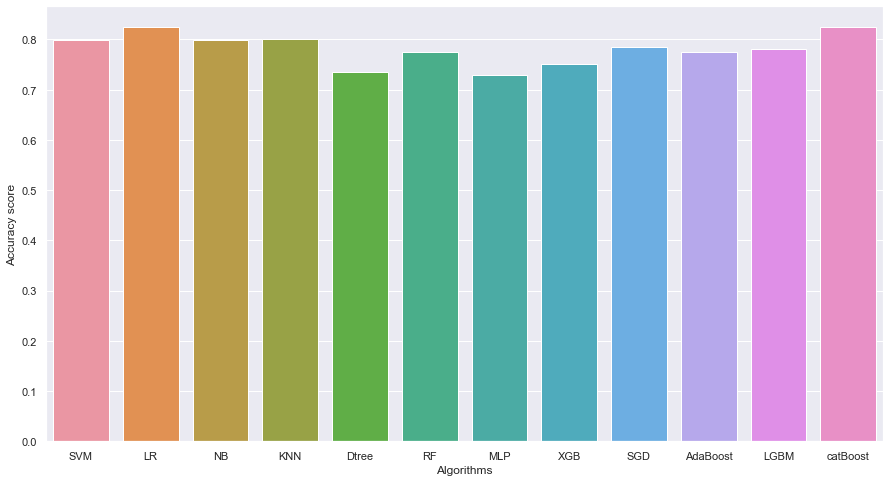

In [128]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(MLA,scores_rfe)

### Forward:

In [129]:
df_minmax_col

Index(['age', 'gender', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [130]:
knn = KNeighborsClassifier(n_neighbors=5)
X = df[['age','gender','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']]
Y = df[['target']]

sfs_forward = SFS(knn, 
          k_features=7, 
          forward=True, 
          floating=True, 
          scoring='accuracy',
          cv=5,
          n_jobs=-1)
sfs_forward = sfs_forward.fit(X, Y,custom_feature_names=df_minmax_col)


pd.DataFrame.from_dict(sfs_forward.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(12,)","[0.8032786885245902, 0.8524590163934426, 0.716...",0.767814,"(thal,)",0.085846,0.066791,0.033396
2,"(11, 12)","[0.819672131147541, 0.8852459016393442, 0.7333...",0.784317,"(ca, thal)",0.089933,0.069971,0.034985
3,"(2, 11, 12)","[0.8688524590163934, 0.9180327868852459, 0.816...",0.84071,"(cp, ca, thal)",0.059356,0.046181,0.023091
4,"(2, 8, 11, 12)","[0.8360655737704918, 0.9016393442622951, 0.816...",0.840874,"(cp, exang, ca, thal)",0.040418,0.031446,0.015723
5,"(2, 5, 8, 11, 12)","[0.8360655737704918, 0.9180327868852459, 0.816...",0.84082,"(cp, fbs, exang, ca, thal)",0.050552,0.039331,0.019665
6,"(1, 2, 5, 8, 11, 12)","[0.7868852459016393, 0.9016393442622951, 0.816...",0.831038,"(gender, cp, fbs, exang, ca, thal)",0.049287,0.038347,0.019173
7,"(1, 2, 5, 8, 10, 11, 12)","[0.8360655737704918, 0.9508196721311475, 0.8, ...",0.84071,"(gender, cp, fbs, exang, slope, ca, thal)",0.080002,0.062244,0.031122


In [131]:
df_select_forward = ['gender', 'cp', 'fbs', 'exang', 'slope', 'ca', 'thal']
df_select_forward.append('target')
df_forward = df_minmax.copy()
df_forward = df_forward[df_select_forward]
df_forward.head()

,gender,cp,fbs,exang,slope,ca,thal,target
0,1,1.000000,0,1,0.5,1.000000,0.0,1
1,1,1.000000,0,1,0.5,0.666667,1.0,1
2,1,0.666667,0,0,1.0,0.000000,0.0,0
3,0,0.333333,0,0,0.0,0.000000,0.0,0
4,1,0.333333,0,0,0.0,0.000000,0.0,0


## Check the output of the algorithms for df_forward (output of forward) :

In [149]:
algo={
    'NB':MultinomialNB(alpha=1.0),
    'Logistic Regression':LogisticRegression(),
    'SVM':svm.SVC(kernel='poly',random_state=1),
    'KNN':KNeighborsClassifier(n_neighbors=11),
    'Dtree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(random_state=1),
    'Multi-layer-Perceptron':MLPClassifier(solver='lbfgs', alpha=1e-5,random_state=3),
    'XGBoost':xgb.XGBClassifier(objective="binary:logistic", random_state=3),
    'Stochastic-Gradient-Descent':SGDClassifier(loss="hinge", penalty="l2", max_iter=8),
    'AdaBoost':AdaBoostClassifier(n_estimators=100, random_state=3),
    'LightGBM ':LGBMClassifier(),
    'catBoost':CatBoostClassifier(verbose=0, n_estimators=100),
}



df2_f = df_forward.drop(['target'], axis = 1)
df_f_col =df2_f.columns
result_beforeNorm=k_fold_results(df2_f[df_f_col],df['target'],algo=algo)
result_beforeNorm.T

,accuracy,recall,specificity,precision,F1
SVM,0.807742,0.753176,0.859082,0.826484,0.778684
Logistic Regression,0.840860,0.796248,0.882907,0.863868,0.817339
NB,0.739032,0.688122,0.799334,0.739650,0.696447
KNN,0.811290,0.770605,0.851825,0.830769,0.788474
Dtree,0.771075,0.688822,0.847351,0.804648,0.730575
Random Forest,0.814194,0.791395,0.835714,0.805129,0.793310
Multi-layer-Perceptron,0.764409,0.758062,0.773978,0.740943,0.739934
XGBoost,0.817527,0.776775,0.854145,0.821400,0.789055
Stochastic-Gradient-Descent,0.737849,0.804845,0.699223,0.731258,0.739676
AdaBoost,0.820753,0.769723,0.866041,0.835844,0.789282


In [150]:
res_forward=result_beforeNorm.T
scores_forward = res_forward['accuracy'].values


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

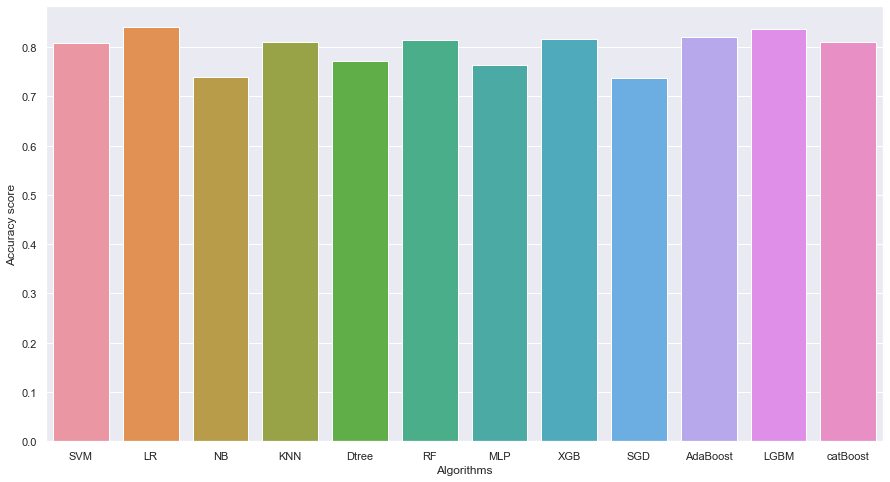

In [151]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(MLA,scores_forward)

### Backward:

In [152]:
sfs_Backward = SFS(knn, 
          k_features=7, 
          forward=False, 
          floating=True, 
          scoring='accuracy',
          cv=3,
          n_jobs=-1)
sfs_Backward = sfs_Backward.fit(X, Y,custom_feature_names=df_minmax_col)
import pandas as pd
pd.DataFrame.from_dict(sfs_Backward.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
13,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.6237623762376238, 0.6138613861386139, 0.68]",0.639208,"(age, gender, cp, trestbps, chol, fbs, restecg...",0.065544,0.029126,0.020595
12,"(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.6237623762376238, 0.6138613861386139, 0.7]",0.645875,"(age, gender, cp, trestbps, chol, fbs, thalach...",0.086605,0.038485,0.027213
11,"(0, 1, 2, 3, 4, 5, 7, 8, 10, 11, 12)","[0.6237623762376238, 0.6138613861386139, 0.7]",0.645875,"(age, gender, cp, trestbps, chol, fbs, thalach...",0.086605,0.038485,0.027213
10,"(0, 1, 2, 3, 4, 5, 7, 8, 11, 12)","[0.6237623762376238, 0.6138613861386139, 0.7]",0.645875,"(age, gender, cp, trestbps, chol, fbs, thalach...",0.086605,0.038485,0.027213
9,"(0, 1, 2, 3, 4, 5, 7, 11, 12)","[0.6237623762376238, 0.6138613861386139, 0.7]",0.645875,"(age, gender, cp, trestbps, chol, fbs, thalach...",0.086605,0.038485,0.027213
8,"(0, 1, 2, 3, 4, 7, 11, 12)","[0.6237623762376238, 0.6138613861386139, 0.7]",0.645875,"(age, gender, cp, trestbps, chol, thalach, ca,...",0.086605,0.038485,0.027213
7,"(0, 2, 3, 4, 7, 11, 12)","[0.6237623762376238, 0.6138613861386139, 0.7]",0.645875,"(age, cp, trestbps, chol, thalach, ca, thal)",0.086605,0.038485,0.027213


In [153]:
df_select_backward = ['age', 'cp', 'trestbps', 'chol', 'thalach', 'ca', 'thal']
df_select_backward.append('target')
df_backward = df_minmax.copy()
df_backward = df_backward[df_select_backward]
df_backward.head()

,age,cp,trestbps,chol,thalach,ca,thal,target
0,0.791667,1.000000,0.622642,0.365297,0.282443,1.000000,0.0,1
1,0.791667,1.000000,0.245283,0.235160,0.442748,0.666667,1.0,1
2,0.166667,0.666667,0.339623,0.283105,0.885496,0.000000,0.0,0
3,0.250000,0.333333,0.339623,0.178082,0.770992,0.000000,0.0,0
4,0.562500,0.333333,0.245283,0.251142,0.816794,0.000000,0.0,0


## Check the output of the algorithms for df_backward (output of backward) :

In [154]:
algo={
    'NB':MultinomialNB(alpha=1.0),
    'Logistic Regression':LogisticRegression(),
    'SVM':svm.SVC(kernel='poly',random_state=1),
    'KNN':KNeighborsClassifier(n_neighbors=11),
    'Dtree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(random_state=1),
    'Multi-layer-Perceptron':MLPClassifier(solver='lbfgs', alpha=1e-5,random_state=3),
    'XGBoost':xgb.XGBClassifier(objective="binary:logistic", random_state=3),
    'Stochastic-Gradient-Descent':SGDClassifier(loss="hinge", penalty="l2", max_iter=8),
    'AdaBoost':AdaBoostClassifier(n_estimators=100, random_state=3),
    'LightGBM ':LGBMClassifier(),
    'catBoost':CatBoostClassifier(verbose=0, n_estimators=100),
}


df2_b = df_backward.drop(['target'], axis = 1)
df_b_col =df2_b.columns
result_beforeNorm=k_fold_results(df2_b[df_b_col],df['target'],algo=algo)
result_beforeNorm.T

,accuracy,recall,specificity,precision,F1
SVM,0.817634,0.757908,0.873756,0.846843,0.791675
Logistic Regression,0.817849,0.787767,0.851665,0.825434,0.797664
NB,0.784839,0.771624,0.802152,0.783677,0.769242
KNN,0.814409,0.794696,0.840485,0.816642,0.795098
Dtree,0.741505,0.696393,0.780442,0.738183,0.708198
Random Forest,0.807742,0.753549,0.855617,0.820214,0.780905
Multi-layer-Perceptron,0.751613,0.736150,0.756620,0.723547,0.724559
XGBoost,0.741505,0.683543,0.791558,0.740411,0.702082
Stochastic-Gradient-Descent,0.794731,0.846154,0.715384,0.781912,0.793007
AdaBoost,0.781613,0.746361,0.816035,0.767512,0.748187


In [155]:
res_b=result_beforeNorm.T
scores_b = res_b['accuracy'].values

<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

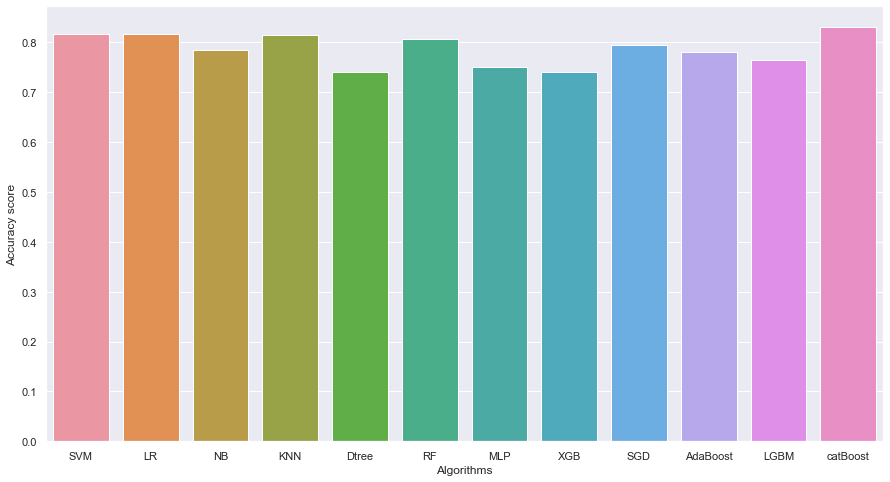

In [156]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(MLA,scores_b)

### Ridge:

R squared Error on test set :  0.05344018537024686
   Column_Name  Coefficient_Value
0          age           0.060257
1       gender           0.101998
2           cp           0.214492
3     trestbps           0.315371
4         chol          -0.002003
5          fbs          -0.065739
6      restecg           0.087613
7      thalach          -0.249616
8        exang           0.090530
9      oldpeak           0.287112
10       slope           0.020034
11          ca           0.410870
12        thal           0.284131
13      target                NaN


<BarContainer object of 14 artists>

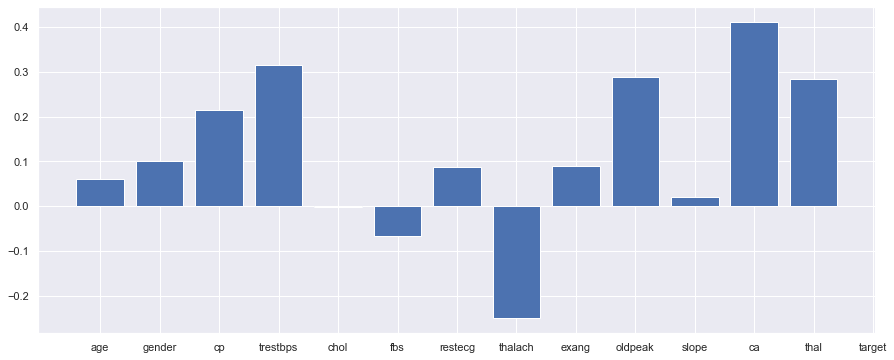

In [157]:
# Train the model
ridgeRegressor = Ridge(alpha = 0.5) #here setting alpha 1
ridgeRegressor.fit(X_train_minmax, y_train_minmax)
y_predicted_ridge = ridgeRegressor.predict(X_test_minmax)

# calculating Mean Squared Error (mse)
R_squared = r2_score(y_predicted_ridge,y_test_minmax)
print("R squared Error on test set : ", R_squared)
feature_names = df.columns

# Putting together the coefficient and their corresponding variable names
coefficient_df = pd.DataFrame()
coefficient_df["Column_Name"] = feature_names
coefficient_df['Coefficient_Value'] = pd.Series(ridgeRegressor.coef_)
print(coefficient_df.head(15))

plt.rcParams["figure.figsize"] = (15,6)
 
plt.bar(coefficient_df["Column_Name"],coefficient_df["Coefficient_Value"])


In [158]:
ridgeRegressor.coef_ = abs(ridgeRegressor.coef_)
ridgeRegressor.coef_

array([0.06025676, 0.10199816, 0.21449238, 0.31537073, 0.00200312,
       0.06573949, 0.0876134 , 0.24961649, 0.09053013, 0.28711194,
       0.02003354, 0.41086974, 0.28413144])

In [159]:
df_select_ridge= []
for i in range (0,len(ridgeRegressor.coef_)):
    if (ridgeRegressor.coef_[i] > 0.1):
        df_select_ridge.append(df_minmax_columns[i])
df_select_ridge.append('target')
df_select_ridge

['gender', 'cp', 'trestbps', 'thalach', 'oldpeak', 'ca', 'thal', 'target']

In [160]:
df_ridge = df_minmax.copy()
df_ridge = df_ridge[df_select_ridge]
df_ridge.head()

,gender,cp,trestbps,thalach,oldpeak,ca,thal,target
0,1,1.000000,0.622642,0.282443,0.241935,1.000000,0.0,1
1,1,1.000000,0.245283,0.442748,0.419355,0.666667,1.0,1
2,1,0.666667,0.339623,0.885496,0.564516,0.000000,0.0,0
3,0,0.333333,0.339623,0.770992,0.225806,0.000000,0.0,0
4,1,0.333333,0.245283,0.816794,0.129032,0.000000,0.0,0


## Check the output of the algorithms for df_ridge (output of ridge) :

In [161]:
algo={
    'NB':MultinomialNB(alpha=1.0),
    'Logistic Regression':LogisticRegression(),
    'SVM':svm.SVC(kernel='poly',random_state=1),
    'KNN':KNeighborsClassifier(n_neighbors=11),
    'Dtree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(random_state=1),
    'Multi-layer-Perceptron':MLPClassifier(solver='lbfgs', alpha=1e-5,random_state=3),
    'XGBoost':xgb.XGBClassifier(objective="binary:logistic", random_state=3),
    'Stochastic-Gradient-Descent':SGDClassifier(loss="hinge", penalty="l2", max_iter=8),
    'AdaBoost':AdaBoostClassifier(n_estimators=100, random_state=3),
    'LightGBM ':LGBMClassifier(),
    'catBoost':CatBoostClassifier(verbose=0, n_estimators=100),
}


df2_rd = df_ridge.drop(['target'], axis = 1)
df_rd_col =df2_rd.columns
result_beforeNorm=k_fold_results(df2_rd[df_rd_col],df['target'],algo=algo)
result_beforeNorm.T

,accuracy,recall,specificity,precision,F1
SVM,0.794731,0.739170,0.851596,0.816324,0.762731
Logistic Regression,0.827849,0.786741,0.868332,0.847696,0.806728
NB,0.794946,0.762881,0.836694,0.805452,0.772740
KNN,0.824624,0.780342,0.870846,0.843725,0.802856
Dtree,0.728280,0.719610,0.741254,0.708939,0.704377
Random Forest,0.794516,0.763817,0.829959,0.791736,0.770572
Multi-layer-Perceptron,0.741398,0.744080,0.749202,0.730293,0.721004
XGBoost,0.778065,0.755983,0.802638,0.773417,0.753723
Stochastic-Gradient-Descent,0.775269,0.636334,0.908693,0.897990,0.694709
AdaBoost,0.794731,0.755214,0.833784,0.795001,0.767486


In [162]:
res_ridge=result_beforeNorm.T
scores_ridge = res_ridge['accuracy'].values

<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

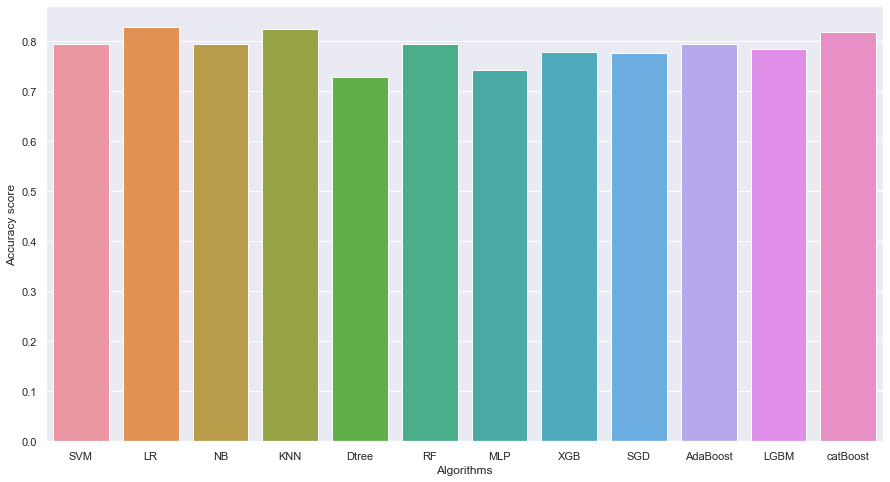

In [163]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(MLA,scores_ridge)

از توجه شما سپاس گزارم



با تشکر. امیررضا زارع